# Task 3: Introduction to Machine Learning

## Section 1: Setup & Dataset

### **Task 1**: Load the Dataset

*Instruction*: Load the preprocessed Titanic dataset (from the previous module or load again if needed). Separate it into features (`X`) and target (`y`, where target = `Survived`).

In [2]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Select relevant columns and drop missing values
titanic_clean = titanic[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()

# Encode 'sex' column: male=1, female=0
titanic_clean['sex'] = titanic_clean['sex'].map({'male': 1, 'female': 0})

# Separate features (X) and target (y)
X = titanic_clean.drop('survived', axis=1)
y = titanic_clean['survived']

# Display shapes and sample data
print("✅ Features (X) shape:", X.shape)
print("✅ Target (y) shape:", y.shape)
print("\n🎯 Sample Features (X):")
print(X.head())

print("\n🎯 Sample Target (y):")
print(y.head())

✅ Features (X) shape: (714, 4)
✅ Target (y) shape: (714,)

🎯 Sample Features (X):
   pclass  sex   age     fare
0       3    1  22.0   7.2500
1       1    0  38.0  71.2833
2       3    0  26.0   7.9250
3       1    0  35.0  53.1000
4       3    1  35.0   8.0500

🎯 Sample Target (y):
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


## Section 2: Splitting the Data

### **Task 2**: Train/Test Split

*Instruction*:

Split the dataset into training and testing sets (80/20 split).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your data is in a pandas DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame
# For demonstration purposes, let's create a sample DataFrame
data = {'feature1': range(100), 'feature2': [x * 2 for x in range(100)], 'target': [0, 1] * 50}
df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Display the first few rows of the training and testing sets
print("\nFirst 5 rows of X_train:")
print(X_train.head())

print("\nFirst 5 rows of X_test:")
print(X_test.head())

print("\nFirst 5 rows of y_train:")
print(y_train.head())

print("\nFirst 5 rows of y_test:")
print(y_test.head())


Shape of X_train: (80, 2)
Shape of X_test: (20, 2)
Shape of y_train: (80,)
Shape of y_test: (20,)

First 5 rows of X_train:
    feature1  feature2
55        55       110
88        88       176
26        26        52
42        42        84
69        69       138

First 5 rows of X_test:
    feature1  feature2
83        83       166
53        53       106
70        70       140
45        45        90
44        44        88

First 5 rows of y_train:
55    1
88    0
26    0
42    0
69    1
Name: target, dtype: int64

First 5 rows of y_test:
83    1
53    1
70    0
45    1
44    0
Name: target, dtype: int64


## Section 3: Train Your First Model

### **Task 3**: Logistic Regression

*Instruction*: Train a Logistic Regression model on the Titanic dataset. Display accuracy on both train and test sets.



In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Basic preprocessing
# Drop rows with missing values in relevant columns
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()

# Convert categorical variables
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])  # male=1, female=0

# Define features and target
X = titanic.drop('survived', axis=1)
y = titanic['survived']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on train and test sets
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Output
print("🚂 Logistic Regression on Titanic Dataset")
print("✅ Training Accuracy:", train_accuracy)
print("🧪 Testing Accuracy:", test_accuracy)

🚂 Logistic Regression on Titanic Dataset
✅ Training Accuracy: 0.8161120840630472
🧪 Testing Accuracy: 0.7552447552447552


## Section 4: Model Evaluation

### **Task 4**: Confusion Matrix & Classification Report

*Instruction*: Evaluate the model using confusion matrix and classification report.

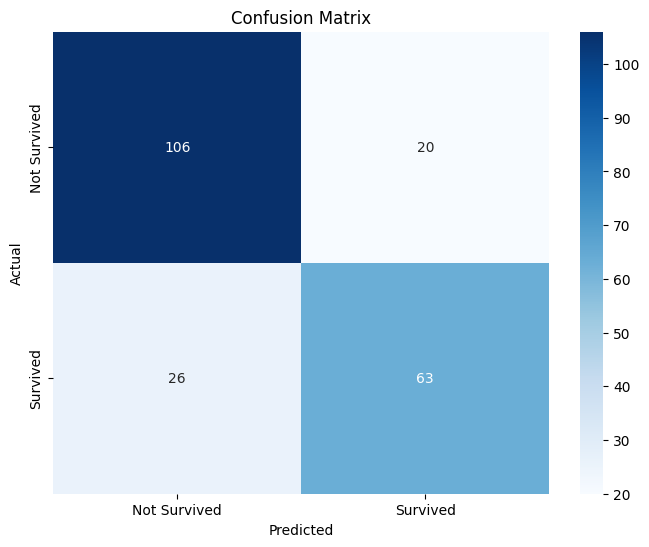


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       126
           1       0.76      0.71      0.73        89

    accuracy                           0.79       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.78      0.79      0.78       215



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Select relevant columns and drop missing values
titanic_clean = titanic[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()

# Encode 'sex' column: male=1, female=0
titanic_clean['sex'] = titanic_clean['sex'].map({'male': 1, 'female': 0})

# Separate features (X) and target (y)
X = titanic_clean.drop('survived', axis=1)
y = titanic_clean['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
cr = classification_report(y_test, y_pred)

print("\n📊 Classification Report:")
print(cr)

## Section 5: Try Another Model

### **Task 5**:  Random Forest Classifier

*Instruction*: Train a `RandomForestClassifier` and compare its performance with Logistic Regression.


In [ ]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings("ignore")  # To suppress warnings from Logistic Regression

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate both models
print("🔍 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("🔍 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\n📊 Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("\n🌲 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


🔍 Logistic Regression Accuracy: 0.9766081871345029
🔍 Random Forest Accuracy: 0.9707602339181286

📊 Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


🌲 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## Section 6: Model Tuning

### **Task 6**: Hyperparameter Tuning (GridSearch)

*Instruction*:Use `GridSearchCV` to tune `n_estimators` and `max_depth` of the Random Forest model.

🏆 Best Hyperparameters: {'max_depth': 5, 'n_estimators': 100}
🥇 Best Accuracy Score (on training data with cross-validation): 0.8316969696969696


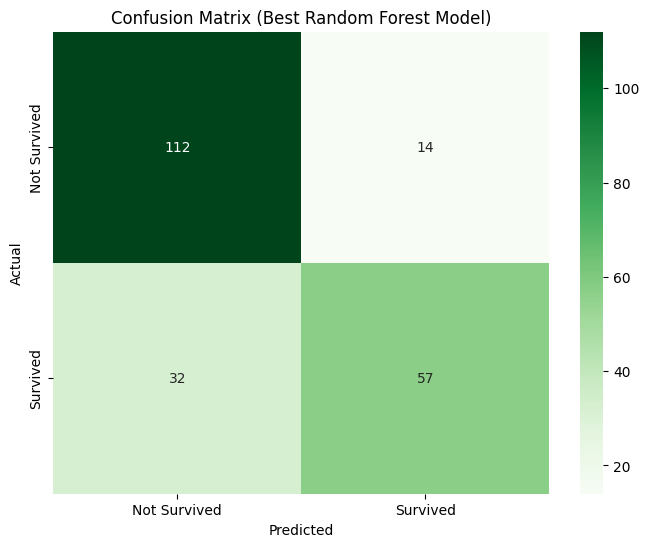


📊 Classification Report (Best Random Forest Model):
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       126
           1       0.80      0.64      0.71        89

    accuracy                           0.79       215
   macro avg       0.79      0.76      0.77       215
weighted avg       0.79      0.79      0.78       215



In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Select relevant columns and drop missing values
titanic_clean = titanic[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()

# Encode 'sex' column: male=1, female=0
titanic_clean['sex'] = titanic_clean['sex'].map({'male': 1, 'female': 0})

# Separate features (X) and target (y)
X = titanic_clean.drop('survived', axis=1)
y = titanic_clean['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)  # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("🏆 Best Hyperparameters:", best_params)
print("🥇 Best Accuracy Score (on training data with cross-validation):", best_score)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Generate the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Random Forest Model)')
plt.show()

# Generate the classification report for the best model
cr = classification_report(y_test, y_pred)

print("\n📊 Classification Report (Best Random Forest Model):")
print(cr)